In [60]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools

class Ti:
    def createData(n):
        data = []
        for i in range(n):
            oneHot = [0]*n
            oneHot[i] = 1
            data.append(oneHot)
        return data
    def createInput(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i] + array[i+1])
        return inputData
    def createInputReverse(array):
        inputData = []
        for i in range(len(array) - 1):
            inputData.append(array[i+1] + array[i])
        return inputData
    def createInputEqual(array): #delete for later
        inputData = []
        for i in range(len(array)):
            inputData.append(array[i] + array[i])
        return inputData
    def createInputTotal(array):
        input = Ti.createInput(array)
        inputReverse = Ti.createInputReverse(array)
        inputEqual = Ti.createInputEqual(array) #delete for later
        return input + inputReverse + inputEqual
    def createLabels(array):
        forwardArr = Ti.createInput(array)
        reverseArr = Ti.createInputReverse(array)
        equalArr = Ti.createInputEqual(array)
        forwardLabel = [1] * len(forwardArr)
        reverseLabel = [0] * len(reverseArr)
        equalLabel = [0] * len(equalArr)
        return forwardLabel + reverseLabel + equalLabel
    def createTest(array):      
        testSet = []
        for i in array:
            for j in array:
                concatenated = i + j #remove equal vectors
                testSet.append(concatenated)
        return testSet


num_items = 2

## TESTING
array = Ti.createData(num_items)
print("Data: ", array)
input = Ti.createInput(array)
print("Input: ", input)
inputReverse = Ti.createInputReverse(array)
print("Input Reverse: ", inputReverse)
inputEqual = Ti.createInputEqual(array)
print("Input Equal: ", inputEqual)

inputTotal = Ti.createInputTotal(array)
print("Total Input: ", inputTotal)

labels = Ti.createLabels(input)
print("Labels: ", labels)

tensorArray = torch.tensor(array)
print(tensorArray)

tensorLabels = torch.tensor(labels)
print(tensorLabels)

tensorInputTotal = torch.tensor(inputTotal)
print(tensorInputTotal)

tensorCreateTest = torch.tensor(Ti.createTest(array))
print(tensorCreateTest)




        

Data:  [[1, 0], [0, 1]]
Input:  [[1, 0, 0, 1]]
Input Reverse:  [[0, 1, 1, 0]]
Input Equal:  [[1, 0, 1, 0], [0, 1, 0, 1]]
Total Input:  [[1, 0, 0, 1], [0, 1, 1, 0], [1, 0, 1, 0], [0, 1, 0, 1]]
Labels:  [0]
tensor([[1, 0],
        [0, 1]])
tensor([0])
tensor([[1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1]])
tensor([[1, 0, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 0, 1]])


In [62]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import itertools
import torch.nn.functional as F

num_items = 10
item_indices = torch.arange(num_items)  # Indices for items 'A', 'B', 'C'
one_hot_vectors = F.one_hot(item_indices, num_classes = num_items)

testSet = []
testLabels = []
for idx_i, i in enumerate(one_hot_vectors):
    for idx_j, j in enumerate(one_hot_vectors):
        concatenated = torch.cat((i,j))
        testSet.append(concatenated.tolist())
        testLabels.append(int(idx_i < idx_j))
        print(idx_i, idx_j)
print(testLabels)
print(testSet)
testSet = torch.tensor(testSet)
testLabels = torch.tensor(testLabels)
inputTotal = torch.tensor(Ti.createInputTotal(one_hot_vectors.tolist()))
labels = torch.tensor(Ti.createLabels(one_hot_vectors.tolist()))

print('One hot vectors: \n', one_hot_vectors)
print('Concatenated Input vectors: \n' ,inputTotal)
print('Labels: \n', labels)
print('Testing Set: \n', testSet)
print('Testing Labels: \n', testLabels)


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [79]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.optim import Adam

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = inputTotal.float()
        self.labels = labels.float()
        self.test_dataset = testSet.float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Retrieve data and labels at the specified index
        x = self.data[index]
        y = self.labels[index]
        return x, y

dataset = CustomDataset(inputTotal, labels)
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1*20, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.BCELoss()
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))  # Make sure y has the same shape as pred

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{len(dataloader.dataset):>5d}]")

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

test_dataset = CustomDataset(testSet, testLabels)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        # Store the true labels and predictions
        true_labels.extend(y.tolist())
        predictions.extend(pred.round().tolist())

correct = sum(p == t for p, t in zip(predictions, true_labels))
print(correct)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

# X = torch.tensor( [0, 0, 0, 0, 0, 0], dtype=torch.float32).unsqueeze(0).to(device)
# logits = model(X)
# predictions = torch.sign(torch.tanh(logits))
# print('prediction:', predictions)



Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
loss: 0.680652  [    0/   28]
loss: 0.678751  [    0/   28]
loss: 0.676921  [    0/   28]
loss: 0.675157  [    0/   28]
loss: 0.673458  [    0/   28]
loss: 0.671821  [    0/   28]
loss: 0.670244  [    0/   28]
loss: 0.668723  [    0/   28]
loss: 0.667257  [    0/   28]
loss: 0.665844  [    0/   28]
loss: 0.664482  [    0/   28]
loss: 0.663167  [    0/   28]
loss: 0.661900  [    0/   28]
loss: 0.660677  [    0/   28]
loss: 0.659497  [    0/   28]
loss: 0.658359  [    0/   28]
loss: 0.657260  [    0/   28]
loss: 0.656199  [    0/   28]
loss: 0.655174  [    0/   28]
loss: 0.654185  [    0/   28]
loss: 0.653229  [    0/   28]
loss: 0.652306  [    0/   28]
loss: 0.651414  [    0/   28]
loss: 0.650551  [    0/   28]
loss: 0.649717  [    0/   28]
loss: 0.648911  [    

In [46]:
testSet.float()

tensor([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],


In [64]:
print(model(testSet.float()))
testSet

tensor([[0.1085],
        [0.7351],
        [0.6252],
        [0.5696],
        [0.6302],
        [0.6065],
        [0.5713],
        [0.5285],
        [0.7156],
        [0.8161],
        [0.0693],
        [0.2095],
        [0.6441],
        [0.4124],
        [0.4150],
        [0.3690],
        [0.3974],
        [0.4450],
        [0.5333],
        [0.7194],
        [0.0931],
        [0.1461],
        [0.2045],
        [0.6138],
        [0.3045],
        [0.3166],
        [0.3422],
        [0.3813],
        [0.4618],
        [0.6739],
        [0.0778],
        [0.2229],
        [0.1864],
        [0.1887],
        [0.6212],
        [0.3063],
        [0.3358],
        [0.3149],
        [0.4043],
        [0.6664],
        [0.0677],
        [0.2903],
        [0.2735],
        [0.1975],
        [0.1764],
        [0.6382],
        [0.3241],
        [0.3462],
        [0.3912],
        [0.5826],
        [0.0664],
        [0.2160],
        [0.2829],
        [0.2941],
        [0.2206],
        [0

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1]])

In [57]:
testLabels.reshape(5,5)

tensor([[0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]])

In [59]:
model(testSet.float()).reshape(5,5)

tensor([[0.0933, 0.7676, 0.5895, 0.7358, 0.8610],
        [0.0490, 0.1603, 0.7233, 0.5696, 0.7475],
        [0.0389, 0.1177, 0.1602, 0.6867, 0.6383],
        [0.0343, 0.1042, 0.1117, 0.1964, 0.7517],
        [0.0069, 0.0289, 0.0396, 0.0525, 0.1298]], grad_fn=<ViewBackward0>)

In [65]:
testLabels.reshape(10,10)

tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [70]:
import matplotlib.pyplot as plt

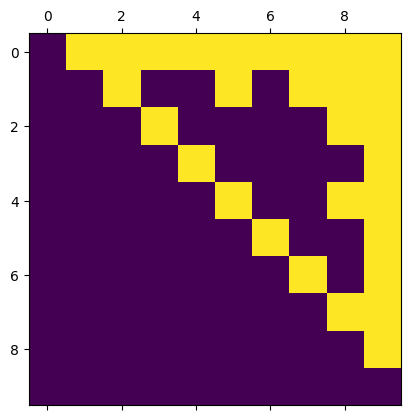

In [81]:
plt.matshow(model(testSet.float()).reshape(10,10).detach())

In [47]:
true_labels

[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]

In [48]:
(model(testSet.float())[:,0].round()==testLabels).float().mean()

tensor(1.)

In [6]:
from torchinfo import summary
summary(model, input_size=(1, 1, 1, 6))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1, 1, 1]              --
├─Sequential: 1-1                        [1, 1, 1, 1]              --
│    └─Linear: 2-1                       [1, 1, 1, 512]            3,584
│    └─ReLU: 2-2                         [1, 1, 1, 512]            --
│    └─Linear: 2-3                       [1, 1, 1, 1]              513
│    └─Sigmoid: 2-4                      [1, 1, 1, 1]              --
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

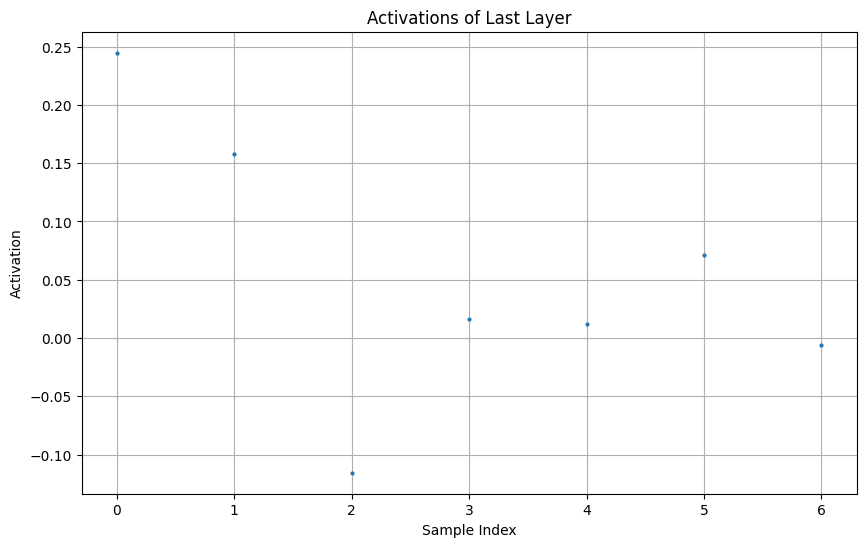

In [15]:
import matplotlib.pyplot as plt

# Define a function to get the activations of the last layer
def get_activations(model, dataloader):
    model.eval()
    activations = []

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            # Get the activations of the last layer (before sigmoid)
            logits = model(X)
            # Append the activations to the list
            activations.extend(logits.cpu().numpy())

    return activations

# Get the activations of the last layer for the test dataset
activations = get_activations(model, test_dataloader)

# Plot the activations
plt.figure(figsize=(10, 6))
plt.plot(activations, 'o', markersize=2)
plt.xlabel('Sample Index')
plt.ylabel('Activation')
plt.title('Activations of Last Layer')
plt.grid(True)
plt.show()

C:\Users\lukel\AppData\Local\Temp\ipykernel_26920\2814909403.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(pred_label)  # Convert to integer


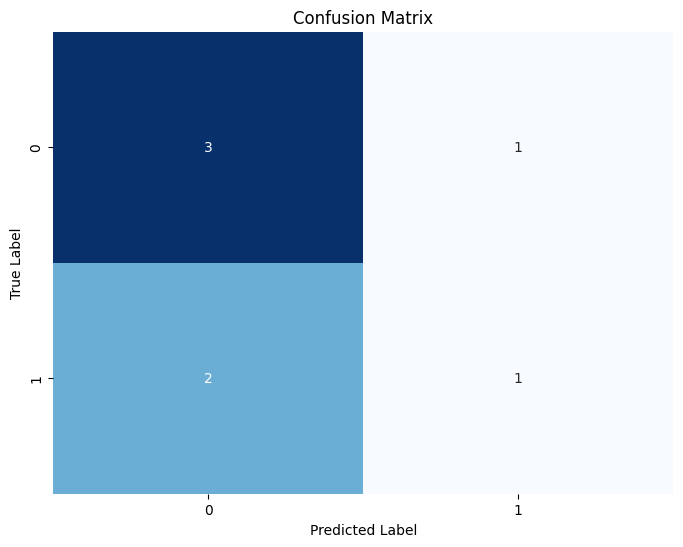

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert true labels and predictions to numpy arrays
true_labels_np = np.array(true_labels)
predictions_np = np.array(predictions)

# Calculate confusion matrix
conf_matrix = np.zeros((2, 2))
for true_label, pred_label in zip(true_labels_np, predictions_np):
    true_label = int(true_label)  # Convert to integer
    pred_label = int(pred_label)  # Convert to integer
    conf_matrix[true_label][pred_label] += 1

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

